### <font color='red'> Buzz Prediction on Twitter (Classification Part II)

This is a continuation of the Classification Task and the objectives are as below:
- Applied four voting classifier, two with hard voting and two with soft voting.
- Applied previous two models with adaboost boosting.
- Applied one model with gradient bossting.
- Applied PCA on the data and then applied all the previous models again on top of this. 
- Compared the results of PCA with the previous models
- Applied a deep learning model


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
data = pd.read_csv('Twitter-Absolute-Sigma-500.data', header=None)

In [6]:
data.columns = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6',
               'AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3',
                'BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1',
               'AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6',
               'AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0',
               'ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Target']

In [4]:
data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


In [5]:
data.shape

(140707, 78)

In [6]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.197396
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.398035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
NCD_0        140707 non-null int64
NCD_1        140707 non-null int64
NCD_2        140707 non-null int64
NCD_3        140707 non-null int64
NCD_4        140707 non-null int64
NCD_5        140707 non-null int64
NCD_6        140707 non-null int64
AI_0         140707 non-null int64
AI_1         140707 non-null int64
AI_2         140707 non-null int64
AI_3         140707 non-null int64
AI_4         140707 non-null int64
AI_5         140707 non-null int64
AI_6         140707 non-null int64
AS(NA)_0     140707 non-null float64
AS(NA)_1     140707 non-null float64
AS(NA)_2     140707 non-null float64
AS(NA)_3     140707 non-null float64
AS(NA)_4     140707 non-null float64
AS(NA)_5     140707 non-null float64
AS(NA)_6     140707 non-null float64
BL_0         140707 non-null float64
BL_1         140707 non-null float64
BL_2         140707 non-null float64
BL_3         140707 non-null 

In [7]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data, sample_target, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Voting Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

c:\users\deval\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [11]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
knn_clf = KNeighborsClassifier(20)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [13]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [14]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.950824332006822
KNeighborsClassifier 0.9627629334849346
VotingClassifier 0.9482660602615123


c:\users\deval\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
voting_clf_s = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf)], voting='soft')
voting_clf_s.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [16]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, voting_clf_s):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.950824332006822
KNeighborsClassifier 0.9627629334849346
VotingClassifier 0.9590676520750426


c:\users\deval\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Bagging

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [18]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9670267197271177


In [19]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.96
Test score: 0.97


In [20]:
report_table = [['Decision Tree Classifier with Bagging', '-', bag_clf.score(X_train, y_train), bag_clf.score(X_test, y_test)]]

In [21]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [22]:
print('Train score: {:.2f}'.format(rnd_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(rnd_clf.score(X_test, y_test)))

Train score: 0.97
Test score: 0.97


In [23]:
report_table = report_table + [['Random Forest Classifier with Bagging', 'max leaf nodes=16', rnd_clf.score(X_train, y_train), rnd_clf.score(X_test, y_test)]]

# Pasting

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf1 = DecisionTreeClassifier(random_state=0)
paste_clf = BaggingClassifier(dt_clf1, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

paste_clf.fit(X_train, y_train)
y_pred = paste_clf.predict(X_test)

In [25]:
print('Train score: {:.2f}'.format(paste_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(paste_clf.score(X_test, y_test)))

Train score: 0.96
Test score: 0.97


In [26]:
report_table = report_table + [['Decision Tree with Pasting', '-', paste_clf.score(X_train, y_train), paste_clf.score(X_test, y_test)]]

In [27]:
knn_clf = KNeighborsClassifier(5)

pasting_knn = BaggingClassifier(knn_clf, n_estimators = 500, max_samples = 100, bootstrap = False, n_jobs = -1, random_state=0)
pasting_knn.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [29]:
print('Train score: {:.2f}'.format(pasting_knn.score(X_train, y_train)))
print('Test score: {:.2f}'.format(pasting_knn.score(X_test, y_test)))

Train score: 0.95
Test score: 0.96


In [30]:
report_table = report_table + [['KNN Classifier with Pasting', 'K=5', pasting_knn.score(X_train, y_train), pasting_knn.score(X_test, y_test)]]

# Adaboost

In [31]:
from sklearn.ensemble import AdaBoostClassifier

In [32]:
from sklearn.model_selection import train_test_split
_, sample_data_10, _, sample_target_10 = train_test_split(X, y, shuffle = True, test_size = 0.01)

In [33]:
X_train_10_org, X_test_10_org, y_train_10, y_test_10 = train_test_split(sample_data_10, sample_target_10, random_state = 0)

scaler = MinMaxScaler()
X_train_10 = scaler.fit_transform(X_train_10_org)
X_test_10 = scaler.transform(X_test_10_org)

In [34]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train_10, y_train_10)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [35]:
print('Train score: {:.2f}'.format(ada_clf.score(X_train_10, y_train_10)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test_10, y_test_10)))

Train score: 1.00
Test score: 0.96


In [36]:
report_table = report_table + [['Ada Boost with Decision Tree', 'max depth=1', ada_clf.score(X_train_10, y_train_10), ada_clf.score(X_test_10, y_test_10)]]

In [37]:
ada_clf2 = AdaBoostClassifier(RandomForestClassifier(max_leaf_nodes=16, n_jobs=-1, random_state=0), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf2.fit(X_train_10, y_train_10)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [38]:
print('Train score: {:.2f}'.format(ada_clf2.score(X_train_10, y_train_10)))
print('Test score: {:.2f}'.format(ada_clf2.score(X_test_10, y_test_10)))

Train score: 1.00
Test score: 0.96


In [39]:
report_table = report_table + [['Ada Boost with Random Forest', 'max leaf nodes=16', ada_clf2.score(X_train_10, y_train_10), ada_clf2.score(X_test_10, y_test_10)]]

# Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.966


In [41]:
report_table = report_table + [['Gradient Boosting', '-', gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)]]

In [42]:
report_table

[['Decision Tree Classifier with Bagging',
  '-',
  0.9629489244764522,
  0.9670267197271177],
 ['Random Forest Classifier with Bagging',
  'max leaf nodes=16',
  0.9689187908651569,
  0.9681637293916998],
 ['Decision Tree with Pasting', '-', 0.9631384440443476, 0.966173962478681],
 ['KNN Classifier with Pasting',
  'K=5',
  0.9495877949398276,
  0.9553723706651507],
 ['Ada Boost with Decision Tree', 'max depth=1', 1.0, 0.9573863636363636],
 ['Ada Boost with Random Forest',
  'max leaf nodes=16',
  1.0,
  0.9573863636363636],
 ['Gradient Boosting', '-', 0.9788685681796645, 0.966173962478681]]

# Models Using PCA

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.98) + 1

In [45]:
d

8

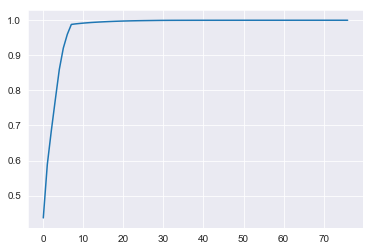

In [48]:
sns.set_style("darkgrid")
plt.plot(cumsum)
plt.show()

In [49]:
pca = PCA(n_components = 8)
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.fit_transform(X_test)

### KNN Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(20)
knn.fit(X_reduced_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [52]:
print('Train score: {:.2f}'.format(knn.score(X_reduced_train, y_train)))
print('Test score: {:.2f}'.format(knn.score(X_reduced_test, y_test)))

Train score: 0.96
Test score: 0.96


In [53]:
from sklearn.metrics import roc_auc_score
y_knn_predict = knn.predict(X_reduced_test)
y_knn_train_predict = knn.predict(X_reduced_train)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_knn_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_knn_predict, y_test))

Train roc_auc_score: 0.93
Test roc_auc_score: 0.94 


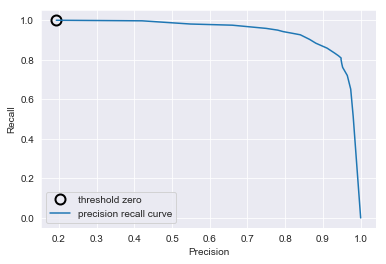

In [56]:
from sklearn.metrics import precision_recall_curve
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test,knn.predict_proba(X_reduced_test)[:, 1])

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [57]:
pca_report_table = [['PCA on KNN Classification', 'K=20', knn.score(X_reduced_train, y_train), knn.score(X_reduced_test, y_test)]]

### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logis_reg = LogisticRegression(C=10,penalty='l1')

In [60]:
logis_reg.fit(X_reduced_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
print('Train score: {:.2f}'.format(logis_reg.score(X_reduced_train, y_train)))
print('Test score: {:.2f}'.format(logis_reg.score(X_reduced_test, y_test)))

Train score: 0.96
Test score: 0.96


In [62]:
from sklearn.metrics import roc_auc_score
y_log_predict = logis_reg.predict(X_reduced_test)
y_log_train_predict = logis_reg.predict(X_reduced_train)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_log_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_log_predict, y_test))

Train roc_auc_score: 0.94
Test roc_auc_score: 0.95 


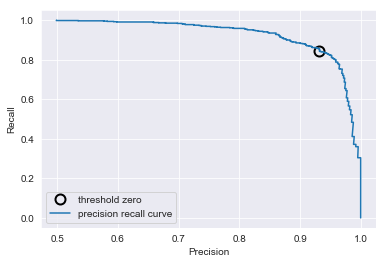

In [64]:
from sklearn.metrics import precision_recall_curve
%matplotlib inline
precision, recall, thresholds = precision_recall_curve(y_test, logis_reg.decision_function(X_reduced_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [65]:
pca_report_table = pca_report_table + [['PCA on Logistic Regression', 'C=10,penalty=l1', logis_reg.score(X_reduced_train, y_train), logis_reg.score(X_reduced_test, y_test)]]

### Linear SVC

In [66]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC(C=10)

In [67]:
svc_lin.fit(X_reduced_train,y_train)

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [68]:
print('Train score: {:.2f}'.format(svc_lin.score(X_reduced_train, y_train)))
print('Test score: {:.2f}'.format(svc_lin.score(X_reduced_test, y_test)))

Train score: 0.95
Test score: 0.96


In [71]:
from sklearn.metrics import roc_auc_score
y_linsvc_predict = svc_lin.predict(X_reduced_test)
y_linsvc_train_predict = svc_lin.predict(X_reduced_train)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_linsvc_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_linsvc_predict, y_test))

Train roc_auc_score: 0.94
Test roc_auc_score: 0.95 


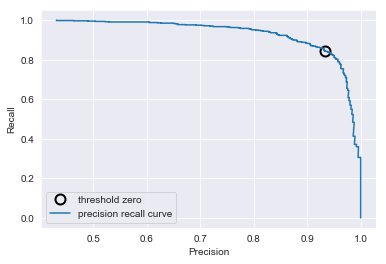

In [72]:
from sklearn.metrics import precision_recall_curve
%matplotlib inline
precision, recall, thresholds = precision_recall_curve(y_test, svc_lin.decision_function(X_reduced_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [73]:
pca_report_table = pca_report_table + [['PCA on SVC', 'C=10', svc_lin.score(X_reduced_train, y_train), svc_lin.score(X_reduced_test, y_test)]]

### Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtree = DecisionTreeClassifier(max_depth=4)

In [76]:
dtree.fit(X_reduced_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
print('Train score: {:.2f}'.format(dtree.score(X_reduced_train, y_train)))
print('Test score: {:.2f}'.format(dtree.score(X_reduced_test, y_test)))

Train score: 0.95
Test score: 0.94


In [81]:
pca_report_table = pca_report_table + [['PCA on Decision Tree', 'max_depth=4', dtree.score(X_reduced_train, y_train), dtree.score(X_reduced_test, y_test)]]

### Kernelized SVM

In [84]:
from sklearn.svm import SVC, LinearSVC

svc_linear = SVC(kernel = 'linear',C=10)
svc_linear.fit(X_reduced_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [85]:
print('Train score: {:.2f}'.format(svc_linear.score(X_reduced_train, y_train)))
print('Test score: {:.2f}'.format(svc_linear.score(X_reduced_test, y_test)))

Train score: 0.95
Test score: 0.96


In [86]:
pca_report_table = pca_report_table + [['PCA on Kernelized SVM', 'C=10', svc_linear.score(X_reduced_train, y_train), svc_linear.score(X_reduced_test, y_test)]]

### SVM RBF

In [87]:
svc_rbf = SVC(kernel = 'rbf',C=10,gamma=0.01)
svc_rbf.fit(X_reduced_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
print('Train score: {:.2f}'.format(svc_rbf.score(X_reduced_train, y_train)))
print('Test score: {:.2f}'.format(svc_rbf.score(X_reduced_test, y_test)))

Train score: 0.94
Test score: 0.94


In [89]:
from sklearn.metrics import roc_auc_score
y_radsvc_predict = svc_rbf.predict(X_reduced_test)
y_radsvc_train_predict = svc_rbf.predict(X_reduced_train)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_radsvc_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_radsvc_predict, y_test))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.95 


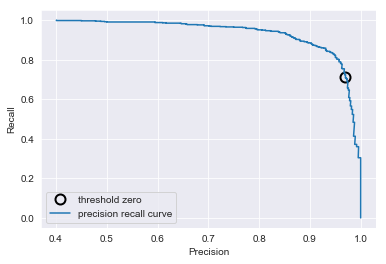

In [90]:
from sklearn.metrics import precision_recall_curve
%matplotlib inline
precision, recall, thresholds = precision_recall_curve(y_test, svc_rbf.decision_function(X_reduced_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [91]:
pca_report_table = pca_report_table + [['PCA on SVM RBF', 'C=10,gamma=0.01', svc_rbf.score(X_reduced_train, y_train), svc_rbf.score(X_reduced_test, y_test)]]

### SVC Poly

In [92]:
svc_poly = SVC(degree = 3, C=10)
svc_poly.fit(X_reduced_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
print('Train score: {:.2f}'.format(svc_poly.score(X_reduced_train, y_train)))
print('Test score: {:.2f}'.format(svc_poly.score(X_reduced_test, y_test)))

Train score: 0.95
Test score: 0.96


In [94]:
pca_report_table = pca_report_table + [['PCA on SVC Poly', 'C=10', svc_poly.score(X_reduced_train, y_train), svc_poly.score(X_reduced_test, y_test)]]

In [95]:
pca_report_table

[['PCA on KNN Classification', 'K=20', 0.9552733819766891, 0.9565093803297328],
 ['PCA on Logistic Regression',
  'C=10,penalty=l1',
  0.9550838624087937,
  0.958214894826606],
 ['PCA on SVC', 'C=10', 0.9541362645693168, 0.9579306424104604],
 ['PCA on Decision Tree',
  'max_depth=4',
  0.9450393253103383,
  0.9388857305287095],
 ['PCA on Kernelized SVM', 'C=10', 0.954989102624846, 0.9590676520750426],
 ['PCA on SVM RBF', 'C=10,gamma=0.01', 0.9391642187055813, 0.9397384877771461],
 ['PCA on SVC Poly', 'C=10', 0.9538519852174737, 0.958214894826606]]

In [96]:
pca_report = pd.DataFrame(pca_report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy'])
pca_report.index = pca_report['Model name']
pca_report

,Model name,Model parameter,Train accuracy,Test accuracy
Model name,,,,
PCA on KNN Classification,PCA on KNN Classification,K=20,0.955273,0.956509
PCA on Logistic Regression,PCA on Logistic Regression,"C=10,penalty=l1",0.955084,0.958215
PCA on SVC,PCA on SVC,C=10,0.954136,0.957931
PCA on Decision Tree,PCA on Decision Tree,max_depth=4,0.945039,0.938886
PCA on Kernelized SVM,PCA on Kernelized SVM,C=10,0.954989,0.959068
PCA on SVM RBF,PCA on SVM RBF,"C=10,gamma=0.01",0.939164,0.939738
PCA on SVC Poly,PCA on SVC Poly,C=10,0.953852,0.958215


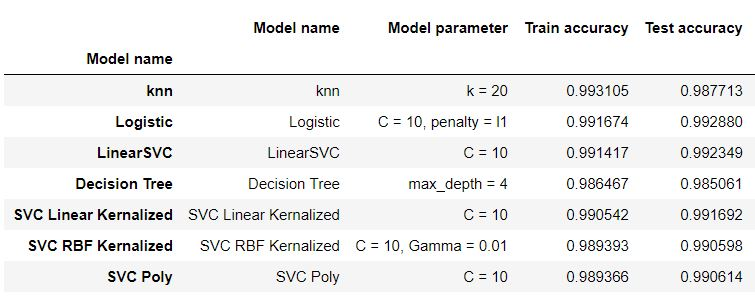

In [97]:
from IPython.display import Image
Image(filename = 'project2_results.jpg', width = 700, height = 700)

Based on above results, it seems that PCA doesn't help in improving the results of the models. A plausible reason can be that by using PCA we are losing information. The components of PCA are not able to explain the required variance which all the original features together can.

# Neural Network

In [9]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=77, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Fit the model
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
10553/10553 [==============================] - 2s 169us/step - loss: 0.2286 - acc: 0.9135
Epoch 2/150
10553/10553 [==============================] - 1s 116us/step - loss: 0.1033 - acc: 0.9620
Epoch 3/150
10553/10553 [==============================] - 1s 107us/step - loss: 0.0975 - acc: 0.9632
Epoch 4/150
10553/10553 [==============================] - 1s 118us/step - loss: 0.0947 - acc: 0.9628
Epoch 5/150
10553/10553 [==============================] - 1s 122us/step - loss: 0.0931 - acc: 0.9629
Epoch 6/150
10553/10553 [==============================] - 1s 117us/step - loss: 0.0911 - acc: 0.9645
Epoch 7/150
10553/10553 [==============================] - 1s 114us/step - loss: 0.0898 - acc: 0.9652
Epoch 8/150
10553/10553 [==============================] - 1s 118us/step - loss: 0.0891 - acc: 0.9632
Epoch 9/150
10553/10553 [==============================] - 1s 121us/step - loss: 0.0888 - acc: 0.9664
Epoch 10/150
10553/10553 [==============================] - 1s 112us/step - loss: 

10553/10553 [==============================] - 2s 152us/step - loss: 0.0799 - acc: 0.9686
Epoch 81/150
10553/10553 [==============================] - 2s 173us/step - loss: 0.0794 - acc: 0.9673
Epoch 82/150
10553/10553 [==============================] - 2s 158us/step - loss: 0.0794 - acc: 0.9683
Epoch 83/150
10553/10553 [==============================] - 1s 120us/step - loss: 0.0791 - acc: 0.9684
Epoch 84/150
10553/10553 [==============================] - 1s 134us/step - loss: 0.0801 - acc: 0.9675
Epoch 85/150
10553/10553 [==============================] - 2s 148us/step - loss: 0.0801 - acc: 0.9665
Epoch 86/150
10553/10553 [==============================] - 1s 120us/step - loss: 0.0792 - acc: 0.9684
Epoch 87/150
10553/10553 [==============================] - 1s 122us/step - loss: 0.0789 - acc: 0.9683
Epoch 88/150
10553/10553 [==============================] - 1s 125us/step - loss: 0.0789 - acc: 0.9676
Epoch 89/150
10553/10553 [==============================] - 1s 119us/step - loss: 0.07

In [13]:
model.evaluate(X_test, y_test)

3518/3518 [==============================] - 0s 26us/step


[0.09887792861312543, 0.9621944286526436]